<a href="https://colab.research.google.com/github/sarvnn/EIP4/blob/master/CODE9-VACC9959.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


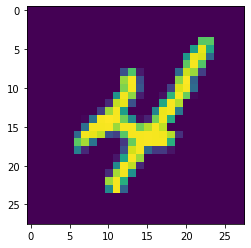

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[9])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [106]:
from keras.layers import Activation

dp=0.1

model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(dp))


model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(dp))


model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(dp))


model.add(Convolution2D(16, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(dp))

# model.add(Convolution2D(16, 3, 3, activation='relu'))#3
# model.add(BatchNormalization())
# model.add(Dropout(dp))

model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(dp))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipy

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_338 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_295 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_295 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_339 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_296 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_296 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_340 (Conv2D)          (None, 24, 24, 10)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [111]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.002 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.002.
60000/60000 [==============================] - 40s 662us/step - loss: 0.0897 - acc: 0.9570 - val_loss: 0.0219 - val_acc: 0.9930
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0015163002.
60000/60000 [==============================] - 9s 146us/step - loss: 0.0864 - acc: 0.9575 - val_loss: 0.0206 - val_acc: 0.9945
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0012210012.
60000/60000 [==============================] - 9s 142us/step - loss: 0.0828 - acc: 0.9593 - val_loss: 0.0195 - val_acc: 0.9942
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0010219724.
60000/60000 [==============================] - 9s 143us/step - loss: 0.0818 - acc: 0.9589 - val_loss: 0.0229 - val_acc: 0.9942
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0008787346.
60000/60000 [=====

In [112]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.017078954667203654, 0.9959]
